In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   frame                 3976 non-null   int64  
 1   Timestamp             3976 non-null   object 
 2   openness_L            3976 non-null   float64
 3   openness_R            3976 non-null   float64
 4   pupil_diameter_L(mm)  3976 non-null   float64
 5   pupil_diameter_R(mm)  3976 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 186.5+ KB


In [309]:
#df_1=pd.read_csv("P1/Eyerecording_Test_Control.csv")
#df = pd.read_csv("P1/Eyerecording_Test_Control.csv", header=0, sep=';')
blink_rate=[]
for i in range(1, 25):
    file_path = f"P{i}/Eyerecording_Test_4_Combined.csv"  # Construct the file path
    df = pd.read_csv(file_path, header=0, sep=';')  # Read the CSV file into a DataFrame
    df.drop(columns=["Unnamed: 6"], inplace=True)
    number_of_frames=df.shape[0]
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    min_blink_duration = 10
    max_blink_duration = 500


    # Determine threshold (example value, adjust based on data)
    threshold = 0.75  # This is a starting point, adjust based on actual data analysis

    # Create boolean masks where the values are below the threshold for each column
    mask1 = df["openness_L"] < threshold
    mask2 = df["openness_R"] < threshold

    # Create a combined mask where both columns have values below the threshold
    combined_mask = mask1 & mask2
    
    # Use the shift function to find where the groups of closed eyes start and end
    start_of_group = combined_mask & (~combined_mask.shift(1).fillna(False))
    end_of_group = (~combined_mask) & combined_mask.shift(-1).fillna(False)

    # Find the indices of start and end of each group
    start_indices = start_of_group[start_of_group].index
    end_indices = end_of_group[end_of_group].index
    filtered_blinks = []
    
    for start, end in zip(start_indices, end_indices):
        duration = np.abs((df['Timestamp'][end] - df['Timestamp'][start]).total_seconds()) * 1000  # Convert to milliseconds
        print(duration)
        if min_blink_duration <= duration <= max_blink_duration:
            filtered_blinks.append((start, end))
    
    # Count the number of valid blinks
    blink_count = len(filtered_blinks)

    """# Create a combined boolean mask where both columns have -1
    column1 = "pupil_diameter_L(mm)"
    column2 = "pupil_diameter_R(mm)"
    combined_mask = (df[column1] == -1) & (df[column2] == -1)

    # Use the shift function to find where the groups of -1 start and end in the combined mask
    start_of_group = combined_mask & (~combined_mask.shift(1).fillna(False))
    end_of_group = (~combined_mask) & combined_mask.shift(-1).fillna(False)

    # Find the indices of start and end of each group
    start_indices = start_of_group[start_of_group].index
    end_indices = end_of_group[end_of_group].index

    # Filter out blinks that are too short or too long
    filtered_blinks = [(start, end) for start, end in zip(start_indices, end_indices) 
                       if min_blink_frames <= (end - start + 1) <= max_blink_frames]

    # Count the number of valid blinks
    blink_count = len(filtered_blinks)
    """
    total_time_minutes = (df['Timestamp'].iloc[-1] - df['Timestamp'].iloc[0]).total_seconds() / 60
    
    # Calculate blink rate per minute
    blink_rate_per_minute = blink_count / total_time_minutes
    temp_val_rounded = round(blink_rate_per_minute, 3)

    blink_rate.append(temp_val_rounded)

11.0
12.0
10.0
10.0
11.5
12.0
11.0
9.0
10.0
12.0
10.0
10.5
12.0
10.0
12.0
10.0
10.6
12.0
10.6
11.5
11.0
12.0
11.0
10.0
9.5
12.0
12.0
10.5
10.5
11.0
13.0
10.5
12.0
12.0
11.5
11.5
13.0
12.0
11.5
12.5
10.5
11.5
12.5
11.5
12.5
10.5
12.5
9.5
11.5
11.5
11.5
10.0
12.0
12.0
11.0
12.5
10.5
10.5
11.5
11.0
10.0
9.5
9.0
12.0
10.0
12.5
12.0
12.0
13.5
10.0
12.0
11.0
12.5
19.5
11.0
10.5
10.5
12.0
11.0
10.0
10.5
9.5
11.0
10.5
11.0
13.5
12.0
12.0
12.0
12.0
11.0
13.0
12.0
10.5
12.0
12.0
10.0
11.5
10.0
11.1
11.5
10.5
10.0
11.5
11.0
12.0
12.0
12.0
12.0
10.5
10.5
10.0
13.0
10.5
12.0
10.0
13.0
11.5
11.5
13.0
10.5
11.0
10.5
12.5
10.5
10.5
10.1
12.0
12.0
10.5
10.5
11.5
12.5
10.0
12.0
12.0
13.5
12.5
12.0
12.5
10.0
10.5
12.5
10.5
11.5
10.0
12.5
12.0
9.5
11.0
11.0
13.0
10.0
12.0
12.6
10.0
12.5
10.5
11.0
12.0
12.5
11.5
12.0
11.0
11.5
11.5
10.5
12.5
103.5
976.1999999999999
13.0
12.5
12.0
12.0
10.5
10.0
11.0
11.0
12.5
13.0
12.0
11.5
12.0
11.0
12.0
10.5
12.0
12.0
13.0
11.0
12.0
9.5
12.0
11.5
11.5
9.5
11.0
12.5
11.5


In [310]:
blink_rate

[18.216,
 27.235,
 47.063,
 26.196,
 34.886,
 29.177,
 38.347,
 20.948,
 20.586,
 28.184,
 13.988,
 8.687,
 24.512,
 35.262,
 56.748,
 21.478,
 23.928,
 19.075,
 27.048,
 0.0,
 30.795,
 37.486,
 32.282,
 29.343]

In [ ]:
## with open('participants_combinedtask.txt', 'w') as file:
    # Iterate through the list and write each item to the file
    for item in blink_rate:
        file.write(str(item) + '\n')  # Add a newline after each item

In [311]:
mean_blink_rate=sum(blink_rate)/len(blink_rate)
print(mean_blink_rate)

27.14458333333333


# Extracting Nasa-TLX information

In [151]:
file_path = "NASA-TLX-SLC.xlsx"  # Construct the file path
df_nasa = pd.read_excel(file_path, header=1)  # Read the CSV file into a DataFrame

In [152]:
df_nasa.head()

,Timestamp,Participant,Age,Gender,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,...,Temporal Demand.3,Performance.3,Effort.3,Frustration.3,Mental Demand.4,Physical Demand.4,Temporal Demand.4,Performance.4,Effort.4,Frustration.4
0,12/16/2022 12:54:05,Test person 1,20-25,Female,4,5,6,6,5,1,...,6,5,6,3,8,7,7,3,7,5
1,12/20/2022 9:22:10,Test Person 2,20-25,Female,6,4,8,5,5,5,...,8,5,8,5,8,4,7,6,7,4
2,12/20/2022 10:01:33,Test Person 3,20-25,Male,4,6,2,9,5,1,...,2,9,2,1,5,3,5,8,4,2
3,12/20/2022 11:09:16,Test person 4,20-25,Female,5,3,7,3,5,2,...,7,1,7,8,5,2,7,4,4,3
4,12/20/2022 12:09:37,Test Person 5,20-25,Female,7,8,6,6,6,1,...,4,9,5,1,7,7,4,6,8,3


In [153]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Timestamp          27 non-null     object
 1   Participant        27 non-null     object
 2   Age                27 non-null     object
 3   Gender             27 non-null     object
 4   Mental Demand      27 non-null     int64 
 5   Physical Demand    27 non-null     int64 
 6   Temporal Demand    27 non-null     int64 
 7   Performance        27 non-null     int64 
 8   Effort             27 non-null     int64 
 9   Frustration        27 non-null     int64 
 10  Mental Demand.1    27 non-null     int64 
 11  Physical Demand.1  27 non-null     int64 
 12  Temporal Demand.1  27 non-null     int64 
 13  Performance.1      27 non-null     int64 
 14  Effort.1           27 non-null     int64 
 15  Frustration.1      27 non-null     int64 
 16  Mental Demand.2    27 non-null     int64 
 17 

In [154]:
df_nasa["Control_Test_Score"]=df_nasa["Mental Demand"]*5+df_nasa["Physical Demand"]*2+df_nasa["Temporal Demand"]*1+df_nasa["Performance"]*1+df_nasa["Effort"]*4+df_nasa["Frustration"]*2
df_nasa["NPC_Test_Score"]=df_nasa["Mental Demand.1"]*5+df_nasa["Physical Demand.1"]*2+df_nasa["Temporal Demand.1"]*1+df_nasa["Performance.1"]*1+df_nasa["Effort.1"]*4+df_nasa["Frustration.1"]*2
df_nasa["Noise_Test_Score"]=df_nasa["Mental Demand.2"]*5+df_nasa["Physical Demand.2"]*2+df_nasa["Temporal Demand.2"]*1+df_nasa["Performance.2"]*1+df_nasa["Effort.2"]*4+df_nasa["Frustration.2"]*2
df_nasa["Second_Task_Score"]=df_nasa["Mental Demand.3"]*5+df_nasa["Physical Demand.3"]*2+df_nasa["Temporal Demand.3"]*1+df_nasa["Performance.3"]*1+df_nasa["Effort.3"]*4+df_nasa["Frustration.3"]*2
df_nasa["Combined_Task_Score"]=df_nasa["Mental Demand.4"]*5+df_nasa["Physical Demand.4"]*2+df_nasa["Temporal Demand.4"]*1+df_nasa["Performance.4"]*1+df_nasa["Effort.4"]*4+df_nasa["Frustration.4"]*2


In [155]:
df_nasa.head()

,Timestamp,Participant,Age,Gender,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,...,Physical Demand.4,Temporal Demand.4,Performance.4,Effort.4,Frustration.4,Control_Test_Score,NPC_Test_Score,Noise_Test_Score,Second_Task_Score,Combined_Task_Score
0,12/16/2022 12:54:05,Test person 1,20-25,Female,4,5,6,6,5,1,...,7,7,3,7,5,64,73,78,84,102
1,12/20/2022 9:22:10,Test Person 2,20-25,Female,6,4,8,5,5,5,...,4,7,6,7,4,81,76,67,110,97
2,12/20/2022 10:01:33,Test Person 3,20-25,Male,4,6,2,9,5,1,...,3,5,8,4,2,65,72,91,44,64
3,12/20/2022 11:09:16,Test person 4,20-25,Female,5,3,7,3,5,2,...,2,7,4,4,3,65,54,92,96,62
4,12/20/2022 12:09:37,Test Person 5,20-25,Female,7,8,6,6,6,1,...,7,4,6,8,3,89,77,95,79,97


In [156]:
output_file_path = 'nasa_workload.csv'  # Replace with your desired output file path
df_nasa.to_csv(output_file_path, index=False)


# Extracting pupil diameter for each user

In [230]:
pupil_diameter=[]
for i in range(1, 25):
    file_path = f"P{i}/Eyerecording_Test_Noise.csv"  # Construct the file path
    df = pd.read_csv(file_path, header=0, sep=';')  # Read the CSV file into a DataFrame
    df.drop(columns=["Unnamed: 6"], inplace=True)
    df_control = df[(df['pupil_diameter_L(mm)'] != -1) & (df['pupil_diameter_R(mm)'] != -1)]

    # Extract the 'pupil_diameter_R(mm)' column
    data_control = df_control['pupil_diameter_R(mm)']

    # Step 2: Calculate the IQR for 'pupil_diameter_R(mm)'
    quartiles = data_control.quantile([0.25, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - 1.5 * IQR
    upper_bound = quartiles[0.75] + 1.5 * IQR

    # Step 3: Filter out outliers based on the IQR bounds
    control_no_outlier = data_control[(data_control > lower_bound) & (data_control < upper_bound)]

    average_control_no_outlier = control_no_outlier.mean()
    temp_val_rounded = round(average_control_no_outlier, 3)
    pupil_diameter.append(temp_val_rounded)


In [231]:
pupil_diameter

[3.725,
 4.501,
 4.439,
 5.26,
 4.839,
 4.981,
 5.479,
 5.262,
 5.701,
 4.179,
 6.268,
 5.127,
 5.316,
 4.328,
 4.125,
 4.43,
 4.781,
 4.198,
 5.002,
 4.487,
 4.086,
 4.57,
 5.984,
 4.625]

In [232]:
with open('participants_noise_pupildiameter.txt', 'w') as file:
    # Iterate through the list and write each item to the file
    for item in pupil_diameter:
        file.write(str(item) + '\n')  # Add a newline after each item

# Classifier using only Nasa scores

In [48]:
file_path = "Dataset_Classifier.xlsx"  # Construct the file path
df_class = pd.read_excel(file_path, header=0)  # Read the CSV file into a DataFrame

In [49]:
df_class.head()

,Nasa Score,Class
0,64,0
1,81,0
2,65,0
3,65,0
4,89,0


In [50]:
X = df_class.iloc[:, 0].values.reshape(-1, 1)  # Assuming the input column is the first column
y = df_class.iloc[:, 1].values  # Assuming the output column is the second column

# Split the dataset into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [51]:
# Train an SVM classifier
svm_classifier = SVC(kernel='rbf',C=10.0, random_state=42)  # You can adjust the kernel and parameters as needed
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.16666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.00      0.00      0.00         4
           2       0.08      0.20      0.12         5
           3       0.50      0.40      0.44         5
           4       0.00      0.00      0.00         5

    accuracy                           0.17        24
   macro avg       0.32      0.16      0.18        24
weighted avg       0.33      0.17      0.19        24



In [52]:
# Train a logistic regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.125
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.08      0.25      0.12         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.12        24
   macro avg       0.07      0.13      0.09        24
weighted avg       0.07      0.12      0.09        24



In [53]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.20833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.12      0.25      0.17         4
           2       0.00      0.00      0.00         5
           3       0.33      0.20      0.25         5
           4       0.29      0.40      0.33         5

    accuracy                           0.21        24
   macro avg       0.25      0.21      0.21        24
weighted avg       0.25      0.21      0.21        24



# Classifier using only Blink Rates

In [18]:
file_path = "Dataset_Combined_with_pupil.xlsx"  # Construct the file path
df_class = pd.read_excel(file_path, header=0)  # Read the CSV file into a DataFrame

In [19]:
df_class.head()

,Pupil Diameter,Blink Rate,Nasa Score,Class
0,3.646,9.068,64,0
1,4.669,21.721,81,0
2,4.637,20.623,65,0
3,5.490,19.863,65,0
4,4.965,30.905,89,0


In [20]:
X = df_class.iloc[:, 1].values.reshape(-1, 1)  # Assuming the input column is the first column
y = df_class.iloc[:, 3].values  # Assuming the output column is the second column

# Split the dataset into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [21]:
# Train an SVM classifier
svm_classifier = SVC(kernel='rbf',C=10.0, random_state=42)  # You can adjust the kernel and parameters as needed
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.125
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.00      0.00      0.00         4
           2       0.33      0.40      0.36         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.12        24
   macro avg       0.11      0.12      0.11        24
weighted avg       0.11      0.12      0.12        24



In [22]:
# Train a logistic regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.16666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.12      0.50      0.19         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.17        24
   macro avg       0.10      0.18      0.12        24
weighted avg       0.10      0.17      0.12        24



C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.16666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.67      0.40      0.50         5

    accuracy                           0.17        24
   macro avg       0.20      0.16      0.17        24
weighted avg       0.21      0.17      0.18        24



# Classifier using only Pupil Diameter

In [57]:
file_path = "Dataset_Combined_with_pupil.xlsx"  # Construct the file path
df_class = pd.read_excel(file_path, header=0)  # Read the CSV file into a DataFrame

In [58]:
X = df_class.iloc[:, 0].values.reshape(-1, 1)  # Assuming the input column is the first column
y = df_class.iloc[:, 3].values  # Assuming the output column is the second column

# Split the dataset into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [59]:
# Train an SVM classifier
svm_classifier = SVC(kernel='rbf',C=10.0, random_state=42)  # You can adjust the kernel and parameters as needed
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.16666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.09      0.25      0.13         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.17        24
   macro avg       0.12      0.17      0.14        24
weighted avg       0.12      0.17      0.14        24



C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# Train a logistic regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.29      1.00      0.44         4
           2       0.00      0.00      0.00         5
           3       0.20      0.40      0.27         5
           4       0.00      0.00      0.00         5

    accuracy                           0.25        24
   macro avg       0.10      0.28      0.14        24
weighted avg       0.09      0.25      0.13        24



C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


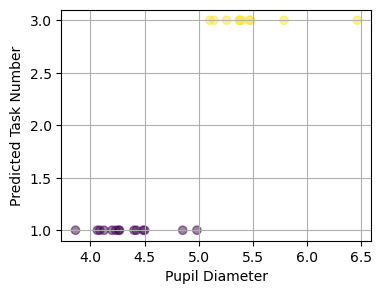

In [68]:
plt.figure(figsize=(4, 3))
scatter = plt.scatter(X_test, y_pred, c=y_pred, alpha=0.5)
plt.xlabel('Pupil Diameter')
plt.ylabel('Predicted Task Number')
plt.grid(True)
plt.show()

In [28]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.20833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       0.17      0.25      0.20         4
           2       0.00      0.00      0.00         5
           3       0.20      0.20      0.20         5
           4       0.33      0.20      0.25         5

    accuracy                           0.21        24
   macro avg       0.21      0.21      0.20        24
weighted avg       0.21      0.21      0.20        24



# Classifier using both NASA and Blink Rates

In [29]:
file_path = "Dataset_Combined_Classifier.xlsx"  # Construct the file path
df_class = pd.read_excel(file_path, header=0)  # Read the CSV file into a DataFrame

In [30]:
df_class.head()

,Blink Rate,Nasa Score,Class
0,9.068,64,0
1,21.721,81,0
2,20.623,65,0
3,19.863,65,0
4,30.905,89,0


In [31]:
X = df_class.iloc[:, 0:2].values  # Assuming the input column is the first column
y = df_class.iloc[:, 2].values  # Assuming the output column is the second column

# Split the dataset into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Train an SVM classifier
svm_classifier = SVC(kernel='rbf',C=10.0, random_state=42)  # You can adjust the kernel and parameters as needed
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.08333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.00      0.00      0.00         4
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.08        24
   macro avg       0.15      0.08      0.10        24
weighted avg       0.16      0.08      0.11        24



In [34]:
# Train a logistic regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logistic_regression_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.16666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.08      0.25      0.12         4
           2       1.00      0.20      0.33         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.17        24
   macro avg       0.32      0.17      0.18        24
weighted avg       0.33      0.17      0.18        24



In [35]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = random_forest_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.125
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.09      0.25      0.13         4
           2       0.17      0.20      0.18         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.12        24
   macro avg       0.10      0.13      0.11        24
weighted avg       0.10      0.12      0.11        24



# Classifier using Pupil Diameter and Blink rate

In [37]:
file_path = "Dataset_Combined_with_pupil.xlsx"  # Construct the file path
df_class = pd.read_excel(file_path, header=0)  # Read the CSV file into a DataFrame

In [38]:
X = df_class.iloc[:, 0:2].values  # Assuming the input column is the first column
y = df_class.iloc[:, 3].values  # Assuming the output column is the second column

# Split the dataset into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Train an SVM classifier
svm_classifier = SVC(kernel='rbf',C=10.0, random_state=42)  # You can adjust the kernel and parameters as needed
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.08333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.08      0.25      0.12         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.08        24
   macro avg       0.07      0.09      0.07        24
weighted avg       0.06      0.08      0.07        24



In [40]:
# Train a logistic regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logistic_regression_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.27      0.75      0.40         4
           2       0.00      0.00      0.00         5
           3       0.50      0.40      0.44         5
           4       0.33      0.20      0.25         5

    accuracy                           0.25        24
   macro avg       0.22      0.27      0.22        24
weighted avg       0.22      0.25      0.21        24



In [41]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = random_forest_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.08333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.08      0.25      0.12         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.08        24
   macro avg       0.06      0.09      0.07        24
weighted avg       0.06      0.08      0.06        24



# Classifier using Pupil diameter and NASA

In [42]:
file_path = "Dataset_Combined_with_pupil.xlsx"  # Construct the file path
df_class = pd.read_excel(file_path, header=0)  # Read the CSV file into a DataFrame

In [43]:
X = df_class.iloc[:, [0,2]].values  # Assuming the input column is the first column
y = df_class.iloc[:, 3].values  # Assuming the output column is the second column

# Split the dataset into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Train an SVM classifier
svm_classifier = SVC(kernel='rbf',C=10.0, random_state=42)  # You can adjust the kernel and parameters as needed
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.125
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.67      0.40      0.50         5
           4       0.00      0.00      0.00         5

    accuracy                           0.12        24
   macro avg       0.18      0.12      0.14        24
weighted avg       0.19      0.12      0.15        24



In [46]:
# Train a logistic regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logistic_regression_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.08333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.20      0.15         5
           1       0.08      0.25      0.12         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.08        24
   macro avg       0.04      0.09      0.05        24
weighted avg       0.04      0.08      0.05        24



C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = random_forest_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.16666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.10      0.25      0.14         4
           2       0.17      0.20      0.18         5
           3       0.00      0.00      0.00         5
           4       0.25      0.20      0.22         5

    accuracy                           0.17        24
   macro avg       0.17      0.17      0.16        24
weighted avg       0.17      0.17      0.16        24



# Classifier using blink rate, NASA and pupil diameter

In [3]:
file_path = "Dataset_Combined_with_pupil.xlsx"  # Construct the file path
df_class = pd.read_excel(file_path, header=0)  # Read the CSV file into a DataFrame

In [4]:
df_class.head()

,Pupil Diameter,Blink Rate,Nasa Score,Class
0,3.646,9.068,64,0
1,4.669,21.721,81,0
2,4.637,20.623,65,0
3,5.490,19.863,65,0
4,4.965,30.905,89,0


In [5]:
X = df_class.iloc[:, 0:3].values  # Assuming the input column is the first column
y = df_class.iloc[:, 3].values  # Assuming the output column is the second column

# Split the dataset into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Train an SVM classifier
svm_classifier = SVC(kernel='rbf',C=10.0, random_state=42)  # You can adjust the kernel and parameters as needed
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.041666666666666664
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.04        24
   macro avg       0.04      0.04      0.04        24
weighted avg       0.04      0.04      0.04        24



In [8]:
# Train a logistic regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)
logistic_regression_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logistic_regression_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.16666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.08      0.25      0.12         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.17        24
   macro avg       0.10      0.17      0.12        24
weighted avg       0.10      0.17      0.12        24



C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91963\miniconda3\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = random_forest_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.08333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.33      0.20      0.25         5

    accuracy                           0.08        24
   macro avg       0.11      0.08      0.09        24
weighted avg       0.11      0.08      0.09        24



# Plots

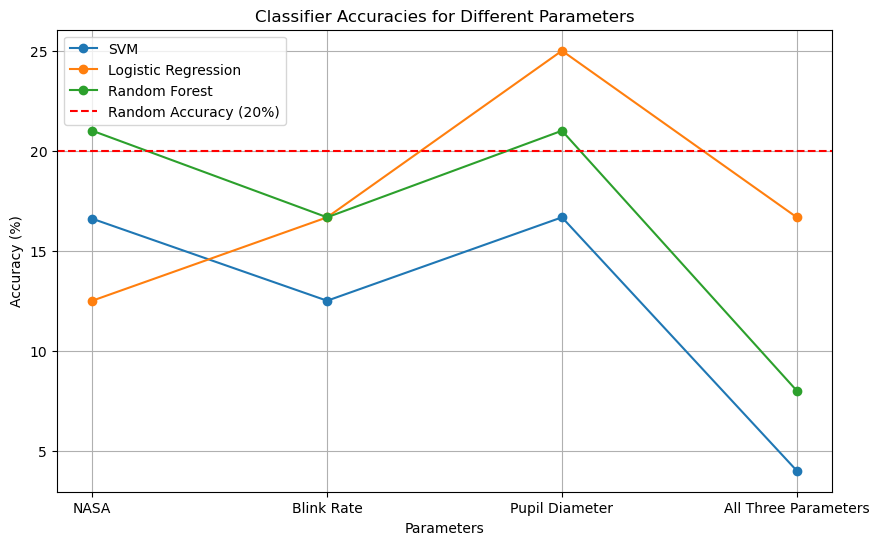

In [56]:
import matplotlib.pyplot as plt
# Data
parameters = ['NASA', 'Blink Rate', 'Pupil Diameter',"All Three Parameters"]
svm = [16.6, 12.5, 16.67,4]
logistic_regression = [12.5, 16.67, 25,16.67]
random_forest = [21, 16.67, 21,8]

# Plotting
plt.figure(figsize=(10, 6))

# Plot for SVM
plt.plot(parameters, svm, marker='o', linestyle='-', label='SVM')

# Plot for Logistic Regression
plt.plot(parameters, logistic_regression, marker='o', linestyle='-', label='Logistic Regression')

# Plot for Random Forest
plt.plot(parameters, random_forest, marker='o', linestyle='-', label='Random Forest')

# Adding the random accuracy line
plt.axhline(y=20, color='r', linestyle='--', label='Random Accuracy (20%)')

# Adding titles and labels
plt.title('Classifier Accuracies for Different Parameters')
plt.xlabel('Parameters')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Display plot
plt.show()